<a href="https://colab.research.google.com/github/Clever-Lazinezz/NoteBook/blob/main/Finance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Introduction

### Objective

The goal of this analysis is to create an accurate logistic regression model which predicts if a client will be approved for a loan given a set of categorical data.

### Why This Project Is Important

Financial Institutes have historically used guidelines(and human bias) to decide on loan approvals. AI applications are used to decrease the bias in these credit decisions. A recurring issue with Machine Learning(ML) models is that they rely on the quality, accuracy, and quantity of relevant data. However, it is the responsibility of the model creators to try their best to select data categories that are the least likely to be biased. In addition, data scientists can account for some biases and utilize tests(such as one-way ANOVAs) to measure mean differences in datasets with a race/ethnicity category. Furthermore, AI applications have the potential to save companies money through employee cost, risk minimization, and processing speed.


### Model Choice and Methodology

#### Intro to Supervised Algorithms

This analysis will create include a logistic regression model. Logistic regression is a supervised classification algorithm. This means that the algorthim learns from labeled data. For example, if we wanted to create a supervised regression model to detect earthquakes, we would need two sets of information. The first being digital measurments collected prior to known earthquakes and the second being measurments collected when no earthquakes occured. Parameters such as hours before a recorded earthquake and what constitutes an earthquake are necesary, but we can ignore this. The important observation is that we have a true case, an earthquake occured, and a false case, an earthquake did not occur. This true and false becomes 1 and 0 respectively. For our model we will be using Loan Approvals represented as a Y(approved) or N(not approved). 

#### How Binary Logistic Regression Works Note: Figures need to be labeled

I know that some readers may be confused that I called logistic regression a classification algorithm. A classification algorithm predicts the group an input belongs with. A regression algorithm predicts an expected value based on previous observed data. Logistic regression combines these two principles. A linear regression model(left photo) and a classifior which makes a maximum likelihood estimate based on the expected value produced by the linear regression model. The full equation for logistic regression is shown in the right photo. Thus, we are classifying objects based on a condition against our linear regression. For example, for the simple linear regression model y = x where x are all real numbers, we can say that when y > 0.5, we classify that point as belonging the the 1's category. If y is less than or equal to 0.5, we classify that point as belonging to the 0's category. Therefore, finding the best fit line is essential.


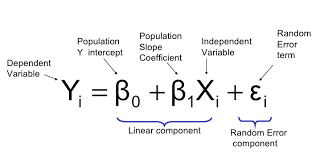 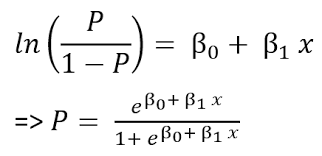


A costly error among linear regression models are outlier data values which skew predicted values. This can come in the form of overestimating or underestimating expected values. In turn, this will lead to an unfavorable amount of classification errors in our logistic regression model. We find the line of best fit by maximizing our cost function. Suppose that for any values above our line of best fit, that y = 1 and for any values below our line of best fit y = -1. We apply the function in figure ... updating parameter B1(Change To Subscript) for each possible linear regression model. Next, we'll take the max function and allow it to be our linear regression model. 

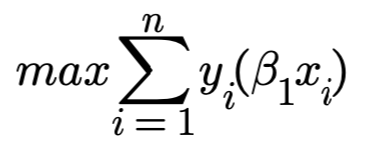

Now that we've found our linear regression model, we need to convert our function into a logistic sigmoid function. A sigmoid function is bounded by y = 0 and y = 1, giving it an 'S'-shaped curve; it's able to represent every output of a function as a number between 0 and 1. Figure ... is the function definition.

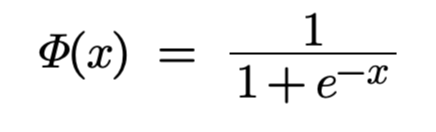

Below is a graph of a simple logistic regression. Note how the function is continuous; y is bound by 0 and 1, while x can go from negative infinity to infinity. 

Text(0.5, 1.0, 'Logistic Regression Visualization')

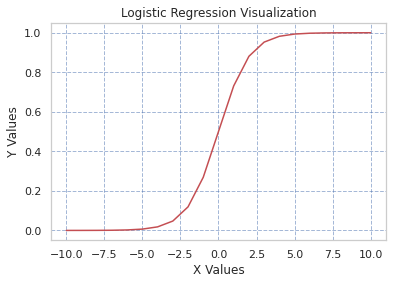

In [ ]:
x = np.arange(-10,11)
y = 1 / (1+(np.exp(-x)))
plt.plot(x,y,'r')
plt.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=1.0)
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Logistic Regression Visualization')

#### The Assumptions of Logistic Regression

To Be Completed

#### Why Binary Logisitc Regression Is An Adequate Model

Binary logistic regression is great for predicting binary outcomes; when there are only two outcomes. As previously mentioned, we are predicting Loan Approvals represented as a Y(approved) or N(not approved). In additon, all of our possible predictor variables are independent of each other and our dataset is large enough to produce a viable model. 

#### Coefficient of Determination

Finding data categories which produce the most accurate linear model requires manualing cleaning data(deleting null data, deleting irrelevant data, converting non-numeric values into numerics, etc.), and researching which data columns may be the most relevant. To help find these columns, we can determine the coefficient of dtermination for pairs of columns. The coefficient of determination assesses the variance of expected outcome values. Thus assessing the performance of a linear regression model. The points on the graph below are the recorded values, the line is a linear regression line, and the lines connecting each point to the regression line represent the difference between the expected outcomes and the actual outcomes. The higher the coefficient of determination, the closer the recorded values are to the predicted values.

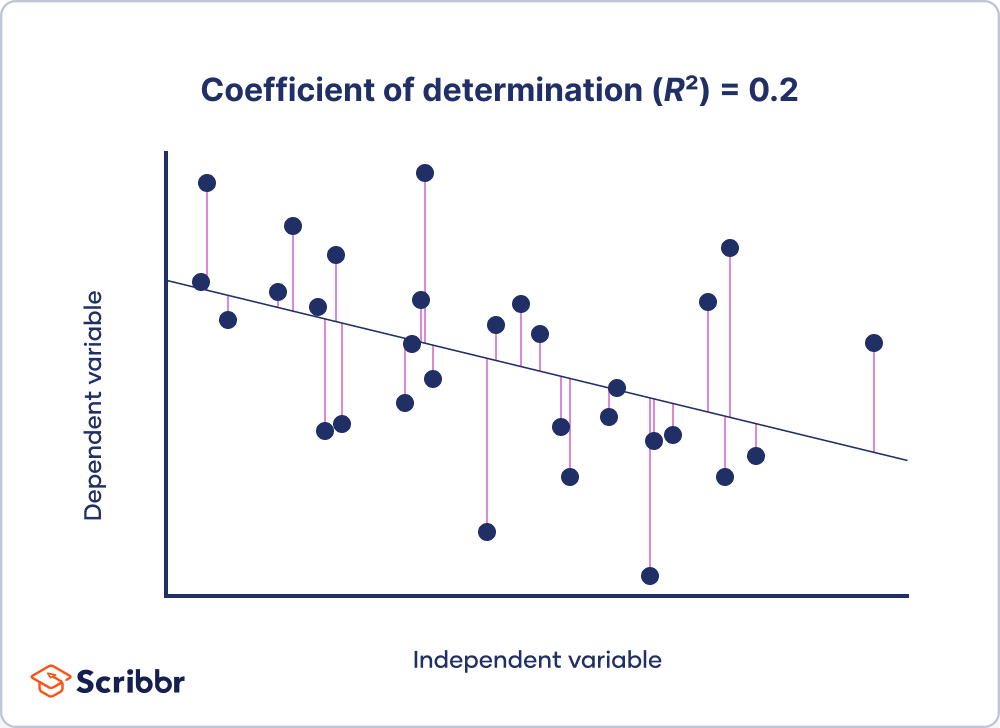

##### Making regression grpah probably not worth the effort(Work in Progress)

In [ ]:
!pip install statsmodels
!pip install bioinfokit
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from bioinfokit.analys import stat, get_data
X = (np.random.rand(25)*13).reshape(-1,1)
y = np.random.rand(25)*21
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
regressor = LinearRegression().fit(X, y)
regressor.fit(X_train,y_train)

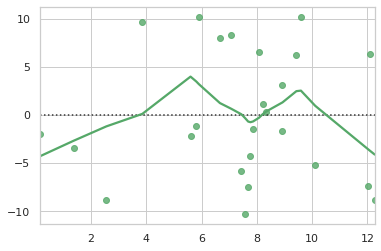

In [ ]:
sns.set_theme(style="whitegrid")
#sns.lmplot( regressor,y)
sns.residplot(x=x, y=y, lowess=True, color="g")

## Read Files

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Clever-Lazinezz/ML-Data2/main/loan_data_set.csv.xls')

## Exploritory Data Analysis

In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
# Checking for columns with excessive null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df['Credit_History']

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 614, dtype: float64

In [ ]:
df['LoanAmount']

0        NaN
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64

In [ ]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [ ]:
# Deleting rows containing an null Credit History and Loan Amount
# Modifying the dateframe directly because these modifications are necesary for every data split
df.dropna(subset=['Credit_History', 'LoanAmount'], inplace=True)

In [ ]:
df[['Credit_History', 'LoanAmount']]

,Credit_History,LoanAmount
1,1.0,128.0
2,1.0,66.0
3,1.0,120.0
4,1.0,141.0
5,1.0,267.0
...,...,...
609,1.0,71.0
610,1.0,40.0
611,1.0,253.0
612,1.0,187.0


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,543.000000,543.000000,543.000000,529.000000,543.000000
mean,5472.331492,1547.268729,145.088398,342.351607,0.843462
std,6330.726832,2504.696507,83.309428,64.861662,0.363699
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2897.500000,0.000000,100.000000,360.000000,1.000000
50%,3814.000000,1126.000000,127.000000,360.000000,1.000000
75%,5790.000000,2251.500000,165.500000,360.000000,1.000000
max,81000.000000,33837.000000,700.000000,480.000000,1.000000


In [ ]:
df.columns.size

13

In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
df.columns[12]

'Loan_Status'

### Converting Non-Numeric values into Numerics

In [ ]:
# These objects have to be converted to Y=1; N=0 to be used in machine learning models
df['Loan_Status']

1      N
2      Y
3      Y
4      Y
5      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 543, dtype: object

In [ ]:
df['Loan_Status'].unique()

array(['N', 'Y'], dtype=object)

In [ ]:
df['Loan_Status'].value_counts()

Y    374
N    169
Name: Loan_Status, dtype: int64

In [ ]:
def convo(arg):
  """
Definition: This function returns '1' if the character recieved is 'Y'
and '0' if the character recieved is 'N'
  """
  if arg=='Y':
    return 1
  elif arg=='N':
    return 0
  # Covers an unexpected case
  else:
    return

In [ ]:
df['Loan_Status'] = df['Loan_Status'].apply(convo)

In [ ]:
df['Loan_Status'].value_counts()

1    374
0    169
Name: Loan_Status, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            543 non-null    object 
 1   Gender             531 non-null    object 
 2   Married            541 non-null    object 
 3   Dependents         530 non-null    object 
 4   Education          543 non-null    object 
 5   Self_Employed      517 non-null    object 
 6   ApplicantIncome    543 non-null    int64  
 7   CoapplicantIncome  543 non-null    float64
 8   LoanAmount         543 non-null    float64
 9   Loan_Amount_Term   529 non-null    float64
 10  Credit_History     543 non-null    float64
 11  Property_Area      543 non-null    object 
 12  Loan_Status        543 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 59.4+ KB


In [ ]:
df['Gender'].value_counts()

Male      433
Female     98
Name: Gender, dtype: int64

In [ ]:
def convo1(arg):
  """
Definition: This function returns '1' if the character recieved is 'Y'
and '0' if the character recieved is 'N'
  """
  if arg=='Male':
    return 1
  elif arg=='Female':
    return 0
  # Covers an unexpected case
  else:
    return

In [ ]:
df['Gender'] = df['Gender'].apply(convo1)

In [ ]:
df['Gender'].unique()

array([ 1.,  0., nan])

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
y = df['Loan_Status']

In [ ]:
  """
  Definition: This function finds the highest Coefficient of Determination among each
  column of data. A Y-VALUE MUST BE STATED PRIOR TO CALLING RUNNING THIS FUNCTION.
  """
  max_arr = ["",""]
  max = -1000
  for x in df.columns:
    for i in df.columns:
      try:
        X = df[[x,i]]
        model.fit(X,y)
        r_squared = model.score(X,y)
        if (r_squared > max) and (r_squared != 1.0):
          max = r_squared
          max_arr[0] = x
          max_arr[1] = i
      except:
        continue
print(max, " is the highest R-value. The pair that produced this was ", max_arr)     

0.31957822381484935  is the highest R-value. The pair that produced this was  ['CoapplicantIncome', 'Credit_History']


## Data Visualizations

## Training Test Splits and Creating Models

In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
#Capatilized letters indicates matrix
X = data.drop("...", axis=1)
y = data["Loan_Status"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

## Conclusion